In [3]:
#import all modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import json
%matplotlib inline

In [165]:
fname = '../Python code/NYC_Taxi_train.csv'
chunk_size=100000
reader = pd.read_csv(fname, iterator=True)
chunks = []
loop = True
while loop:
    try:
        chunk = reader.get_chunk(chunk_size)
        chunks.append(chunk)
    except StopIteration:
        loop = False
        print("Iteration is stopped")

%time df = pd.concat(chunks, ignore_index=True)


Iteration is stopped
Wall time: 283 ms


In [69]:
df.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124


In [173]:
print(df.describe())

          vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  \
count       1.458644e+06      1.458644e+06   1.458644e+06   
mean       -7.397342e+01      4.075180e+01   9.594923e+02   
std         7.064327e-02      3.589056e-02   5.237432e+03   
min        -1.219333e+02      3.218114e+01   1.000000e+00   
25%        -7.39913

In [172]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
duration              1458644 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), object(2), timedelta64[ns](1)
memory usage: 133.5+ MB
None


In [168]:
# df_ac["date"] = pd.to_datetime(df_ac["date"],format="%Y%m%d")
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],format="%Y%m%d %H:%M:%S")
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'],format="%Y%m%d %H:%M:%S")
df['duration']=(df['dropoff_datetime']-df['pickup_datetime'])

In [72]:
df['duration'] = df['duration'].apply(lambda x: x.seconds)

In [160]:
df_correct = df[df['passenger_count']!=0]
df_correct = df[df['trip_duration']<2000]


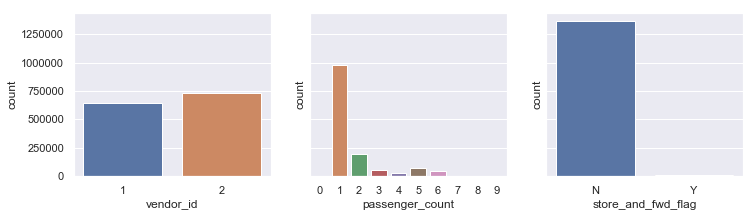

In [159]:
# countplot
import seaborn as sns
sns.set(style="darkgrid")
f, axes = plt.subplots(1,3,figsize=(12, 3), sharex='col', sharey = 'row')
ax = sns.countplot(x="vendor_id", data=df_correct, ax=axes[0])
ax = sns.countplot(x="passenger_count", data=df_correct, ax=axes[1])
ax = sns.countplot(x="store_and_fwd_flag", data=df_correct, ax=axes[2])


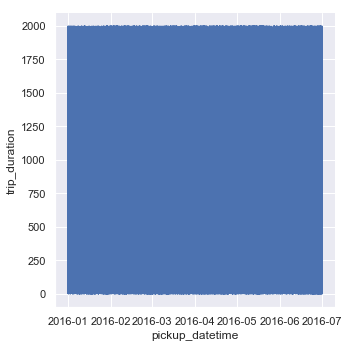

In [161]:
sns.relplot(x="pickup_datetime", y="trip_duration", kind="line", data=df_correct);
sns.relplot((x="pickup_datetime", y="trip_duration", hue="vendor_id", kind="line", data=df_correct);

In [79]:
# categorical: vendor_id/passenger_count/store_and_fwd_flag
# numerical: trip_duration

df_correct[['passenger_count', 'trip_duration']].groupby(['passenger_count'], as_index=False).mean().sort_values(by='trip_duration', ascending=False)

,passenger_count,trip_duration
4,5,1070.232174
5,6,1061.355223
3,4,1053.529749
2,3,1028.236276
1,2,1005.458335
0,1,930.399753
8,9,560.000000
7,8,104.000000
6,7,19.666667


In [80]:
# categorical: vendor_id/passenger_count/store_and_fwd_flag
# numerical: trip_duration

df_correct[['store_and_fwd_flag', 'trip_duration']].groupby(['store_and_fwd_flag'], as_index=False).mean().sort_values(by='trip_duration', ascending=False)

,store_and_fwd_flag,trip_duration
1,Y,1081.156304
0,N,958.786358


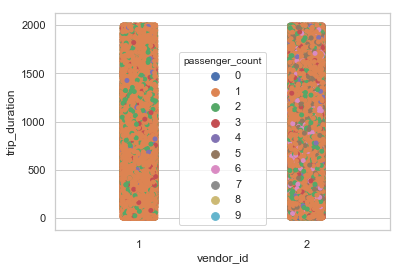

In [92]:
# categorical: vendor_id/passenger_count/store_and_fwd_flag
import seaborn as sns
sns.set(style="whitegrid")

# ax = sns.stripplot(x="vendor_id", y="trip_duration", data=df_correct)
# ax = sns.stripplot(x="vendor_id", y="trip_duration", data=df_correct,jitter=True)
ax = sns.stripplot(x="vendor_id", y="trip_duration", hue="passenger_count", data=df_correct, jitter=True) # next the strips within a second categorical

# ax = sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
# ax = sns.stripplot(x="tip", y="day", data=tips, color=".2")


# g = sns.catplot(x="sex", y="total_bill",hue="smoker", col="time",data=tips, kind="strip",jitter=True,\
#                height=4, aspect=.7); #grouping more variables

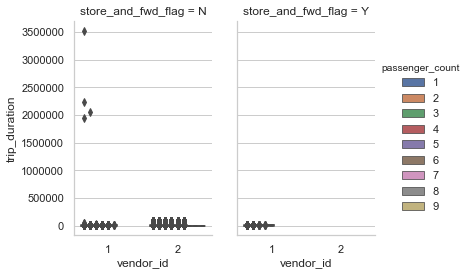

In [89]:
# categorical: vendor_id/passenger_count/store_and_fwd_flag
import seaborn as sns
sns.set(style="whitegrid")

# ax1 = sns.boxplot(x="vendor_id", y="trip_duration", data=df_correct)
ax1 = sns.catplot(x="vendor_id", y="trip_duration",\
                 hue="passenger_count", col="store_and_fwd_flag",\
                 data=df_correct, kind="box",\
                 height=4, aspect=.7);

In [189]:
df_correct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1374115 entries, 0 to 1458643
Data columns (total 12 columns):
id                    1374115 non-null object
vendor_id             1374115 non-null int64
pickup_datetime       1374115 non-null datetime64[ns]
dropoff_datetime      1374115 non-null datetime64[ns]
passenger_count       1374115 non-null int64
pickup_longitude      1374115 non-null float64
pickup_latitude       1374115 non-null float64
dropoff_longitude     1374115 non-null float64
dropoff_latitude      1374115 non-null float64
store_and_fwd_flag    1374115 non-null object
trip_duration         1374115 non-null int64
duration              1374115 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(4), object(2)
memory usage: 136.3+ MB
